In [1]:
#from mpl_toolkits.basemap import Basemap, shiftgrid, cm, addcyclic
import netCDF4 as nc
import numpy as np
import pylab as plt
import iris as iris
import iris.coord_categorisation
import iris.plot as iplt
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import warnings
import cartopy.crs as ccrs
from mpl_toolkits.basemap import Basemap, shiftgrid, cm, addcyclic
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [2]:
filename = '/scratch/ptg21/netscratch/UM_data/aw103/aw103_pm2000_2004_Bry_v2.nc'
data=iris.load(filename)

/home/ptg21/.conda/envs/iris/lib/python2.7/site-packages/iris/fileformats/cf.py:1143: IrisDeprecation: NetCDF default loading behaviour currently does not expose variables which define reference surfaces for dimensionless vertical coordinates as independent Cubes. This behaviour is deprecated in favour of automatic promotion to Cubes. To switch to the new behaviour, set iris.FUTURE.netcdf_promote to True.
  warn_deprecated(msg)


In [3]:
print(data)

0: CH4_32 / (1)                        (time: 60; model_level_number: 85; latitude: 144; longitude: 192)
1: m01s34i994 / (1)                    (time: 60; model_level_number: 85; latitude: 144; longitude: 192)
2: airmass_atm / (1)                   (time: 60; model_level_number: 85; latitude: 144; longitude: 192)
3: Br / (kg kg-1)                      (time: 60; model_level_number: 85; latitude: 144; longitude: 192)
4: mass_fraction_of_bromine_chloride_in_air / (kg kg-1) (time: 60; model_level_number: 85; latitude: 144; longitude: 192)
5: mass_fraction_of_bromine_nitrate_in_air / (kg kg-1) (time: 60; model_level_number: 85; latitude: 144; longitude: 192)
6: mass_fraction_of_hydrogen_bromide_in_air / (kg kg-1) (time: 60; model_level_number: 85; latitude: 144; longitude: 192)
7: mass_fraction_of_methyl_bromide_in_air / (kg kg-1) (time: 60; model_level_number: 85; latitude: 144; longitude: 192)
8: mole_fraction_of_hypobromous_acid_in_air / (kg kg-1) (time: 60; model_level_number: 85; lati

In [4]:
mrair = 28.8
lat_range = [-22,22]

mrbry = 79.+16.
bry=data[0]
bry.data = bry.data * mrair/mrbry*1e12
brysub = bry.intersection(latitude=(lat_range[0],lat_range[1]))
brysub.remove_coord('surface_altitude')
brysub = brysub.collapsed(['latitude','longitude','time'], iris.analysis.MEAN)

mrbro = 79.+16.
bro=data[1]
bro.data = bro.data * mrair/mrbro*1e12
brosub = bro.intersection(latitude=(lat_range[0],lat_range[1]))
brosub.remove_coord('surface_altitude')
brosub = brosub.collapsed(['latitude','longitude','time'], iris.analysis.MEAN)

mrbr = 79.
br=data[3]
br.data = br.data * mrair/mrbr*1e12
brsub = br.intersection(latitude=(lat_range[0],lat_range[1]))
brsub.remove_coord('surface_altitude')
brsub = brsub.collapsed(['latitude','longitude','time'], iris.analysis.MEAN)

mrbrcl = 79. + 35.5
brcl=data[4]
brcl.data = brcl.data * mrair/mrbrcl*1e12
brclsub = brcl.intersection(latitude=(lat_range[0],lat_range[1]))
brclsub.remove_coord('surface_altitude')
brclsub = brclsub.collapsed(['latitude','longitude','time'], iris.analysis.MEAN)

mrbrono2 = 79. + 16. + 14. + 32.
brono2=data[5]
brono2.data = brono2.data * mrair/mrbrono2*1e12
brono2sub = brono2.intersection(latitude=(lat_range[0],lat_range[1]))
brono2sub.remove_coord('surface_altitude')
brono2sub = brono2sub.collapsed(['latitude','longitude','time'], iris.analysis.MEAN)

hbr = data[6]
mrhbr = 79. + 1.
hbr.data = hbr.data * mrair/mrhbr*1e12
hbrsub = hbr.intersection(latitude=(lat_range[0],lat_range[1]))
hbrsub.remove_coord('surface_altitude')
hbrsub = hbrsub.collapsed(['latitude','longitude','time'], iris.analysis.MEAN)

mebr = data[7]
mrmebr = 3. + 12. + 79.
mebr.data = mebr.data*mrair/mrmebr*1e12
mebrsub = mebr.intersection(latitude=(lat_range[0],lat_range[1]))
mebrsub.remove_coord('surface_altitude')
mebrsub = mebrsub.collapsed(['latitude','longitude','time'], iris.analysis.MEAN)

hobr = data[8]
mrhobr = 1. + 16. + 79.
hobr.data = hobr.data*mrair/mrhobr*1e12
hobrsub = hobr.intersection(latitude=(lat_range[0],lat_range[1]))
hobrsub.remove_coord('surface_altitude')
hobrsub = hobrsub.collapsed(['latitude','longitude','time'], iris.analysis.MEAN)

/home/ptg21/.conda/envs/iris/lib/python2.7/site-packages/iris/cube.py:3281: UserWarning: Collapsing spatial coordinate u'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/home/ptg21/.conda/envs/iris/lib/python2.7/site-packages/iris/coords.py:1017: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for u'latitude'.
  warnings.warn(msg.format(self.name()))
/home/ptg21/.conda/envs/iris/lib/python2.7/site-packages/iris/coords.py:1017: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for u'longitude'.
  warnings.warn(msg.format(self.name()))


/home/ptg21/.conda/envs/iris/lib/python2.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  import sys
/home/ptg21/.conda/envs/iris/lib/python2.7/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/ptg21/.conda/envs/iris/lib/python2.7/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


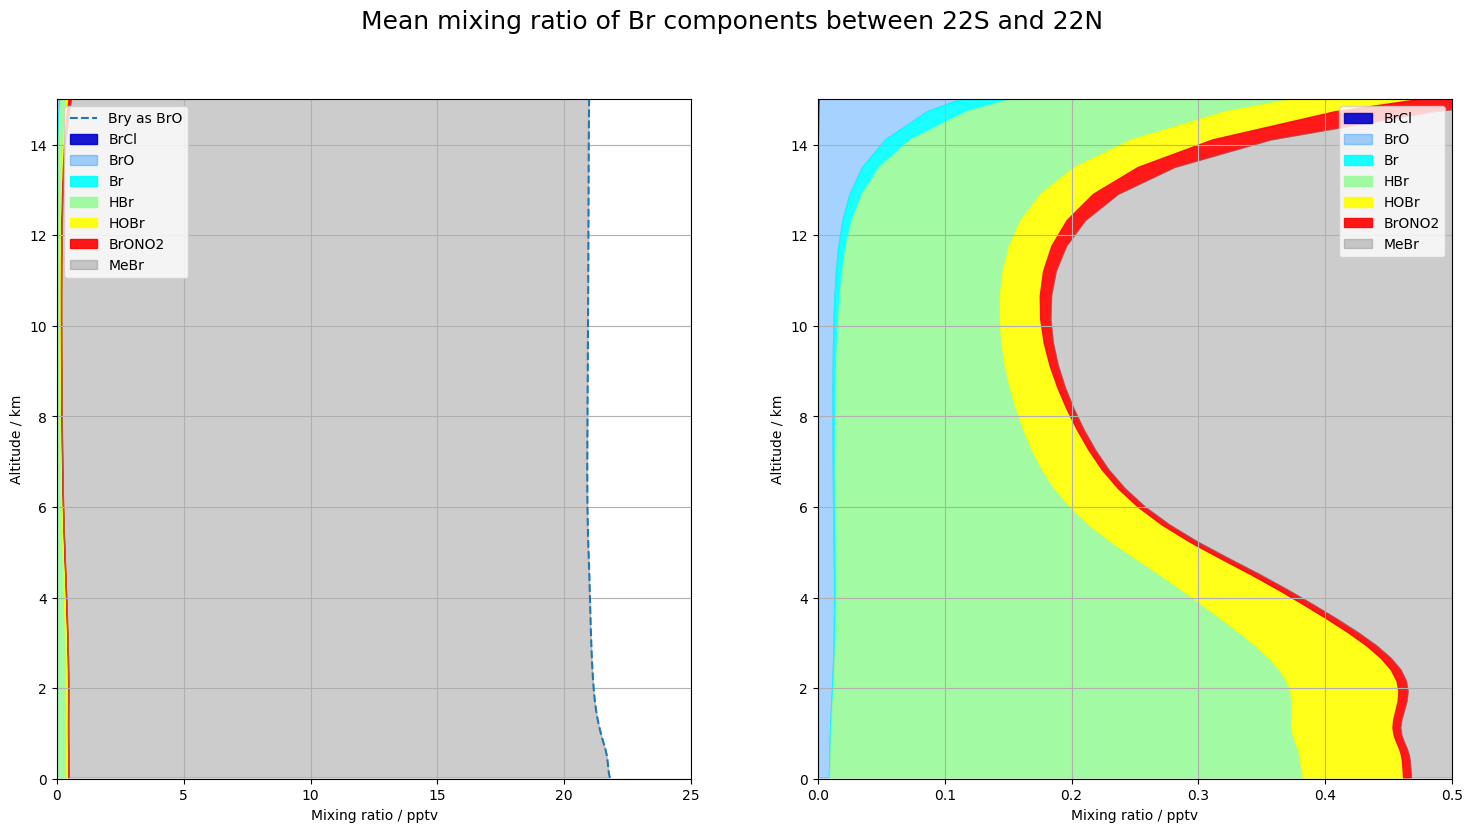

In [5]:
hts=bro.coord('atmosphere_hybrid_height_coordinate').points
import numpy as np
import matplotlib.pyplot as plt


plt.figure(figsize=(18,9), dpi=100)
plt.hold(True)
plt.clf()
plt.subplot(1,2,1)
plt.fill_betweenx(hts/1e3, np.zeros_like(brsub.data), 
                  brclsub.data, 
                  color='mediumblue', alpha=0.9, label='BrCl')#, hbrsub.data, hobrsub.data)

plt.fill_betweenx(hts/1e3,brclsub.data , 
                  brclsub.data+brosub.data, 
                  color='dodgerblue', alpha=0.4, label='BrO')#, hbrsub.data, hobrsub.data)

plt.fill_betweenx(hts/1e3, 
                  brclsub.data+brosub.data,
                  brclsub.data+brosub.data+brsub.data, 
                  color='cyan', alpha=0.9, label='Br')

plt.fill_betweenx(hts/1e3, 
                  brclsub.data+brosub.data+brsub.data,
                  brclsub.data+brosub.data+brsub.data+hbrsub.data, 
                  color='palegreen', alpha=0.9, label='HBr')

plt.fill_betweenx(hts/1e3, 
                  brclsub.data+brosub.data+brsub.data+hbrsub.data,
                  brclsub.data+brosub.data+brsub.data+hbrsub.data+hobrsub.data, 
                  color='yellow', alpha=0.9, label='HOBr')

plt.fill_betweenx(hts/1e3, 
                  brclsub.data+brosub.data+brsub.data+hbrsub.data+hobrsub.data,
                  brclsub.data+brosub.data+brsub.data+hbrsub.data+hobrsub.data+brono2sub.data, 
                  color='red', alpha=0.9, label='BrONO2')

plt.fill_betweenx(hts/1e3, 
                  brclsub.data+brosub.data+brsub.data+hbrsub.data+hobrsub.data+brono2sub.data,
                  brclsub.data+brosub.data+brsub.data+hbrsub.data+hobrsub.data+brono2sub.data+mebrsub.data, 
                  color='gray', alpha=0.4, label='MeBr')

plt.plot(brysub.data, hts/1e3, '--', label='Bry as BrO')
plt.xlim(0,25.)
plt.ylim(0,15)
plt.xlabel('Mixing ratio / pptv')
plt.ylabel('Altitude / km')
plt.grid(True)
plt.legend()


plt.subplot(1,2,2)
plt.fill_betweenx(hts/1e3, np.zeros_like(brsub.data), 
                  brclsub.data, 
                  color='mediumblue', alpha=0.9, label='BrCl')#, hbrsub.data, hobrsub.data)

plt.fill_betweenx(hts/1e3,brclsub.data , 
                  brclsub.data+brosub.data, 
                  color='dodgerblue', alpha=0.4, label='BrO')#, hbrsub.data, hobrsub.data)

plt.fill_betweenx(hts/1e3, 
                  brclsub.data+brosub.data,
                  brclsub.data+brosub.data+brsub.data, 
                  color='cyan', alpha=0.9, label='Br')

plt.fill_betweenx(hts/1e3, 
                  brclsub.data+brosub.data+brsub.data,
                  brclsub.data+brosub.data+brsub.data+hbrsub.data, 
                  color='palegreen', alpha=0.9, label='HBr')

plt.fill_betweenx(hts/1e3, 
                  brclsub.data+brosub.data+brsub.data+hbrsub.data,
                  brclsub.data+brosub.data+brsub.data+hbrsub.data+hobrsub.data, 
                  color='yellow', alpha=0.9, label='HOBr')

plt.fill_betweenx(hts/1e3, 
                  brclsub.data+brosub.data+brsub.data+hbrsub.data+hobrsub.data,
                  brclsub.data+brosub.data+brsub.data+hbrsub.data+hobrsub.data+brono2sub.data, 
                  color='red', alpha=0.9, label='BrONO2')

plt.fill_betweenx(hts/1e3, 
                  brclsub.data+brosub.data+brsub.data+hbrsub.data+hobrsub.data+brono2sub.data,
                  brclsub.data+brosub.data+brsub.data+hbrsub.data+hobrsub.data+brono2sub.data+mebrsub.data, 
                  color='gray', alpha=0.4, label='MeBr')
plt.xlim(0,0.5)
plt.xlabel('Mixing ratio / pptv')
plt.ylabel('Altitude / km')
plt.grid(True)
plt.ylim(0,15.)
plt.legend()
plt.suptitle('Mean mixing ratio of Br components between 22S and 22N', fontsize=18)
plt.show()

In [6]:
def make_map(bbox, projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(20, 20),
                           subplot_kw=dict(projection=projection))
    ax.set_extent(bbox)
    # x0, x1, y0, y1
    #ax.add_feature(LAND, facecolor='white')
    ax.coastlines(resolution='50m')
    gl = ax.gridlines(draw_labels=True, linestyle='--', alpha=0.5, color='gray')
    gl.xlabels_top = gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

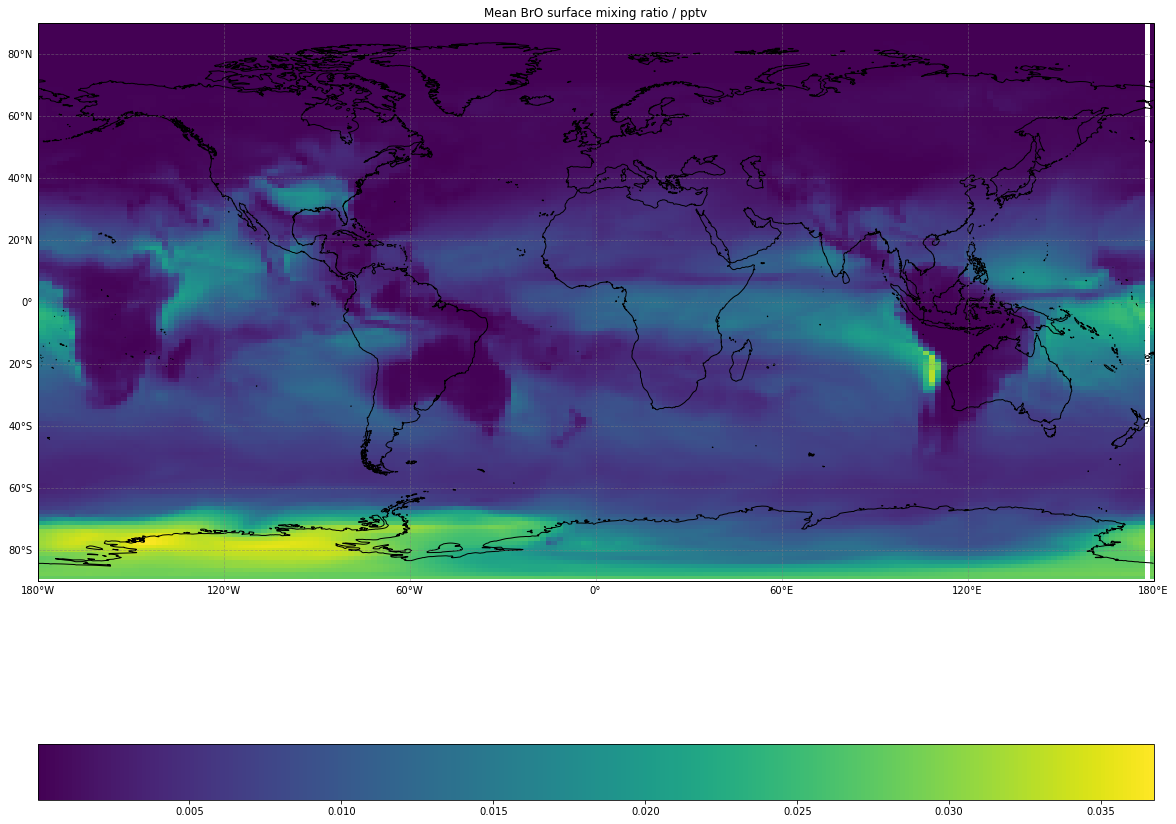

In [7]:
LAND = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                    edgecolor='face',
                                    facecolor=cfeature.COLORS['land'])


lats=data[0].coord('latitude').points
lons=data[0].coord('longitude').points
#hts=data[0].coord('Hybrid height').points
bry.data,lons = shiftgrid(180., bry.data, lons, start=False)

plt.clf()

bbox=[-180, 180, -90, 90]
x,y = lons,lats
fig, ax = make_map(bbox=bbox)
cs = ax.pcolormesh(x, y, np.mean(bro.data[0,0:10,:,:], axis=0))#, vmin=0, vmax=30,cmap='viridis')
cbar = fig.colorbar(cs, orientation='horizontal', shrink=1.)
plt.title('Mean BrO surface mixing ratio / pptv')
plt.show()

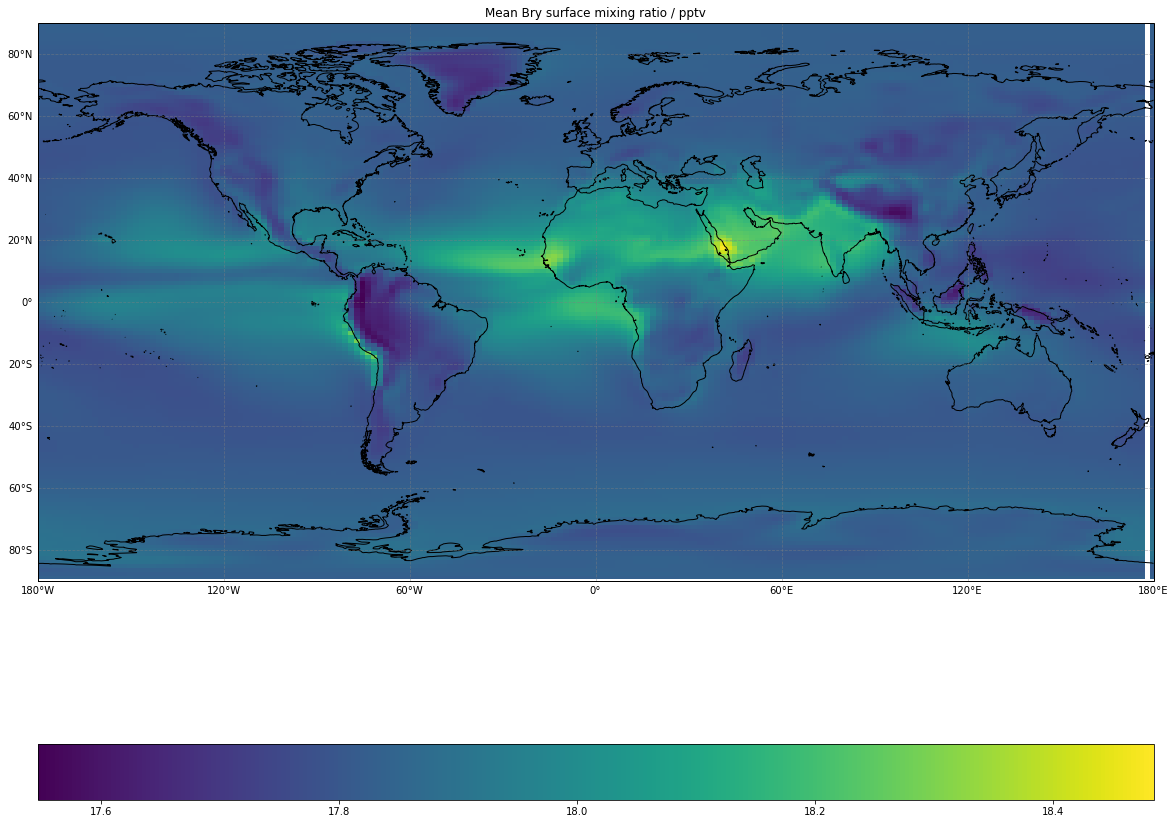

In [8]:
LAND = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                    edgecolor='face',
                                    facecolor=cfeature.COLORS['land'])


lats=data[0].coord('latitude').points
lons=data[0].coord('longitude').points
#hts=data[0].coord('Hybrid height').points
bro.data,lons = shiftgrid(180., bro.data, lons, start=False)

plt.clf()

bbox=[-180, 180, -90, 90]
x,y = lons,lats
fig, ax = make_map(bbox=bbox)
cs = ax.pcolormesh(x, y, np.mean(bry.data[:,0:17,:,:]*79./95,axis=(0,1)) )#,vmin=20., vmax=30,cmap='viridis')
cbar = fig.colorbar(cs, orientation='horizontal', shrink=1.)
plt.title('Mean Bry surface mixing ratio / pptv')
plt.show()